# Udacity Capstone - Working Title

## Table of Contents

<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#feature">The Feature Variables</a></li>
<li><a href="#import1">Import Data</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#dummy">Creation of Dummy Variables</a></li>
<li><a href="#analysis">Analysis</a></li>
<li><a href="#graphs">Graphs</a></li>
<li><a href="#regression">Regression Analysis</a></li>
<li><a href="#conclusion">Conclusion</a></li> 
<li><a href="#references">References</a></li>
</ul>

<a id='introduction'></a>
## Introduction

<a id='feature'></a>
## The Feature Variables
Below is a snapshot of the feature variables in this analysis:
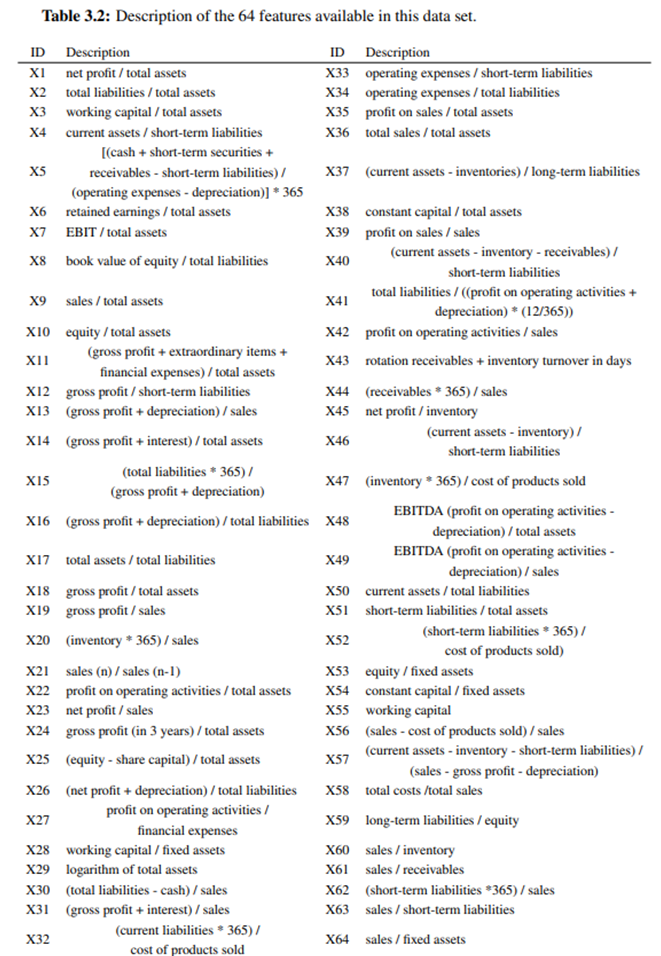

This image comes from Reference 1 of the References Section.

<a id='import1'></a>
## Import Data
This section imports the csv files to pandas dataframes.

In [226]:
# This imports the libraries needed to upload the 
# csv.files.
import os
import numpy as np
import pandas as pd

# This changes the working directory in order to 
# upload the csv files.

part_1 = "C:/Users/bgcam/OneDrive/Documents/Udacity/ml-degree/"
part_2 = "ml-degree-sem-2/capstone/udacity-capstone/data"
new_path = part_1 + part_2
os.chdir(new_path)

# This confirms that the current working directory
# was changed to new_path.
os.getcwd()

'C:\\Users\\bgcam\\OneDrive\\Documents\\Udacity\\ml-degree\\ml-degree-sem-2\\capstone\\udacity-capstone\\data'

In [227]:
# This converts the csv files to pandas dataframes
# for each of the five years.
year_one_df = pd.read_csv("1year.csv")
year_two_df = pd.read_csv("2year.csv")
year_three_df = pd.read_csv("3year.csv")
year_four_df = pd.read_csv("4year.csv")
year_five_df = pd.read_csv("5year.csv")

C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,5,6,8,9,10,13,17,21,23,24,28,34,35,37,47,50,54,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\bgcam\Anaconda3\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0,1,2,5,6,7,9,10,13,14,15,16,17,21,23,24,25,28,33,34,35,37,47,49,50,56,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<a id='assess'></a>
## Data Assessment
This section identifies tidiness and quality issues that need to be cleaned for each dataframe from the five years.


### Assessment: year_one_df

In [228]:
# This tells us the number of rows
# and columns in year_one_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_one_df.shape))

The number of rows and columns (rows, columns) are: (7027, 65).


**Visual Assessment**

In [229]:
# This eliminates the "max_columns" and 
# "max_rows" in visual displays of dataframes.
# This comes from Reference 1.
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# This returns a visual assessment of year_one_df.
# This comes from Reference 2.
year_one_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
6104,0.19154,0.73227,0.21891,1.2995,-24.311,0,0.19154,0.36562,2.3284,0.26773,0.20148,0.26205,0.088667,0.19154,1294.6,0.28194,1.3656,0.19154,0.082261,56.4040,0.95077,0.20148,0.082261,0.38622,0.26685,0.28194,20.267,4.363,3.9279,0.312520,0.085584,125.73,2.903,2.8976,0.20657,2.3284,434.59,0.26909,0.088719,0.008169,0.1128,0.086530,147.960,91.553,0.53232,0.80722,61.896,0.18656,0.080123,1.2971,0.73091,0.34447,5.336,5.363,1854.3000,0.088719,0.71541,0.91780,0.005071,6.4711,3.9868,114.580,3.1856,46.406,0
3494,0.031512,0.36306,0.062637,1.3391,38.077,0,0.040427,1.7543,0.76049,0.63694,0.061564,0.21887,0.096711,0.040427,1801.8,0.20257,2.7543,0.040427,0.053160,6.8536,1.1348,0.057748,0.041437,0.072506,0.61474,0.17802,2.7322,0.083222,5.7706,0.446360,0.066601,138.72,2.771,1.4097,0.27448,0.76049,3.3571,0.70636,0.360930,0.1303,0.13318,0.075936,107.160,100.310,2.2068,1.2618,10.183,0.024628,0.032385,0.68128,0.18471,0.36088,0.84626,0.9385,1.3391,0.360930,0.049474,0.66063,0.109,53.257,3.6387,88.653,4.1172,1.0104,0
5508,0.066749,0.98461,-0.02037,0.97931,-1069.7,-0.24452,0.066749,0.015631,3.339,0.01539,0.13214,0.067792,0.022317,0.066749,4822.8,0.075682,1.0156,0.066749,0.019991,16.8820,1.331,0.13176,0.019991,-0.037815,-0.013457,0.075682,2.0148,-0.56963,3.2389,0.294400,0.020393,111.38,3.2769,3.2769,0.1125,3.339,?,0.01539,0.033694,0.002142,0.23523,0.039460,105.170,88.293,0.43222,0.82246,17.47,0.12399,0.037133,0.97931,0.98461,0.30516,0.43037,0.43037,-35.3060,0.033694,4.3371,0.98589,0,21.621,4.134,107.630,3.3912,93.372,0
1165,0.072107,0.19258,0.34117,3.813,40.707,0,0.091187,4.1926,1.433,0.80742,0.09697,0.75185,0.099815,0.091187,491.45,0.7427,5.1926,0.091187,0.063636,49.4060,1.0454,0.092376,0.050320,0.183,0.64226,0.64362,15.975,0.63468,4.3838,0.065061,0.067400,33.087,11.032,6.9474,0.094997,1.433,6.3009,0.85003,0.066295,0.83383,0.044511,0.064465,92.036,42.630,0.37176,2.2137,52.914,0.040532,0.028286,2.4013,0.12128,0.090648,1.502,1.5813,8256.5000,0.066295,0.089305,0.93697,0.052775,7.3878,8.5621,30.893,11.815,2.6657,0
955,0.010987,0.63484,0.057333,1.0951,-102.49,0,0.015931,0.57519,1.6007,0.36516,0.03284,0.026425,0.031385,0.015931,4612.6,0.079131,1.5752,0.015931,0.009953,113.0200,1.0468,0.024648,0.006864,0.052102,0.14423,0.071343,1.4577,0.16874,3.6686,0.394450,0.015711,138.94,2.6271,2.4949,0.016797,1.6007,11.256,0.37978,0.010494,0.0105,0.35896,0.015399,149.110,36.092,0.022168,0.27302,114.22,-0.009657,-0.006033,1.04,0.60289,0.38065,1.0747,1.1177,267.3300,0.010494,0.030088,0.99028,0.040049,3.2296,10.113,137.480,2.655,4.7109,0
3254,0.32035,0.67668,0.36098,1.5903,9.8433,0.32035,0.39745,0.4778,1.1845,0.32332,0.39745,0.64993,0.152990,0.39745,620.51,0.58823,1.4778,0.39745,0.152760,41.7260,?,0.40458,0.123130,0.39745,0.32332,0.47429,1.842,13.13,4.2257,0.138650,0.152760,101.62,3.5918,0.59789,0.40458,2.6027,10.361,0.38848,0.155510,0.52244,0.054907,0.155510,91.614,49.888,1.0771,1.1039,49.425,0.40398,0.155280,1.4372,0.61152,0.27841,11.76,14.13,6070.1000,0.155760,0.9908,0.84424,0.20153,8.7475,7.3163,85.792,4.2545,94.631,0
3007,0.094811,0.629,0.17563,1.4268,-21.931,0.15926,0.11782,0.58496,1.0846,0.36794,0.11782,0.28631,0.187420,0.11782,1034.3,0.35291,1.5898,0.11782,0.099478,57.5310,1.2821,0.10008,0.080051,0.19754,0.36794,0.31633,0.91645,0.42541,4.6637,0.490710,0.099478,137.55,2.6536,0.1591,0.10008,1.229,1.8413,0.58543,0.084495,0.23557,0.10125,0.084495,151.070,93.539,0.50787,0.97315,62.399,-0.004082,-0.003446,0.93346,0.41151,0.37685,0.89122,1.418,8096.7000,0.078012,0.25768,0.92199,0.59108,6.3444,3.9021,126.820,2.8781,2.8688,0
1282,0.32934,0.

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21" and "attr37" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "target".

**Data Type Assessment**

In [230]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_one_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
attr1     7027 non-null object
attr2     7027 non-null object
attr3     7027 non-null object
attr4     7027 non-null object
attr5     7027 non-null object
attr6     7027 non-null object
attr7     7027 non-null object
attr8     7027 non-null object
attr9     7027 non-null object
attr10    7027 non-null object
attr11    7027 non-null object
attr12    7027 non-null object
attr13    7027 non-null float64
attr14    7027 non-null object
attr15    7027 non-null object
attr16    7027 non-null object
attr17    7027 non-null object
attr18    7027 non-null object
attr19    7027 non-null float64
attr20    7027 non-null float64
attr21    7027 non-null object
attr22    7027 non-null object
attr23    7027 non-null float64
attr24    7027 non-null object
attr25    7027 non-null object
attr26    7027 non-null object
attr27    7027 non-null object
attr28    7027 non-null object
attr29    7027 non-nu

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [231]:
# This is a query to determine whether there are
# duplicated rows in year_one_df.
# This comes from Reference 3.
yr_one_duplicated = year_one_df[year_one_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_one_duplicated.shape[0]))

Number of duplicates: 82


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 82 duplicates that need to be removed.

### Issues: year_one_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "target."

> **Quality Issues**

>> 1. "Attr21" and "attr37" and possibly other feature variables have null values in the form of "?".
>> 2. "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.
>> 3. There are 82 duplicates that need to be removed.

### Assessment: year_two_df

In [232]:
# This tells us the number of rows
# and columns in year_two_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_two_df.shape))

The number of rows and columns (rows, columns) are: (10173, 65).


**Visual Assessment**

In [233]:
# This returns a visual assessment of year_two_df.
# This comes from Reference 2.
year_two_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
7424,0.08042,0.39829,-0.057587,0.85542,-1512.9,-0.10929,0.081392,1.5107,1.9214,0.60171,0.081865,0.20435,0.070705,0.081392,1070.1,0.34108,2.5107,0.081392,0.042361,21.27,?,0.081864,0.041856,0.081392,-0.02722,0.33864,172.95,-0.087346,2.8835,0.15748,0.042608,79.611,4.6185,4.6185,0.095278,1.9214,?,0.60171,0.049589,0.24032,0.09739,0.042607,46.54,25.27,0.71826,0.5743,22.217,0.027405,0.014263,0.85542,0.39829,0.21652,0.91265,0.91265,-44.042,0.049589,0.13365,0.95764,0,17.16,14.444,75.663,4.824,2.9143,0
6526,0,0,0.36403,?,-11907,0,0,?,-0.61259,1.0378,0,?,0,0,?,?,?,0,0,156.89,?,-0.17654,0,0,1.0378,?,10.544,2.2855,4.9485,-16.816,0,0,?,?,-0.17654,2.1689,?,1.0378,-1.7213,?,0,-1.7213,13726,13569,0,?,-96.11,-0.17654,-1.7213,?,0,0,6.5157,6.5157,32333,2.6324,0,-1.6324,0,2.3265,0.026899,0,?,0.64394,0
1579,0.13944,0.2854,0.66242,3.321,87.82,0,0.17268,2.5038,2.2454,0.7146,0.18366,0.60505,0.083929,0.17268,552.76,0.66032,3.5038,0.17268,0.076904,25.829,1.0008,0.17149,0.062098,0.35251,0.67643,0.54384,15.619,12.694,3.8163,0.020071,0.081794,50.481,7.2304,7.2304,0.18186,2.2454,?,0.7146,0.080991,0.85598,0.050803,0.07637,114.36,88.529,0.87752,2.7642,28.106,0.15571,0.069345,3.321,0.2854,0.1383,13.694,13.694,4339.3,0.080991,0.19513,0.92351,0,14.131,4.123,46.393,7.8676,43.031,0
5116,0.070806,0.31105,0.42921,2.3799,-29.631,0.18797,0.087959,2.0116,1.0297,0.62571,0.087959,0.28278,0.039286,0.087959,915.37,0.39874,3.2149,0.087959,0.027861,27.824,1.1943,0.069856,0.022428,0.23457,0.62571,0.3436,0.22784,1.6525,5.9756,0.086322,0.027861,37.029,9.8572,0.22458,0.069856,3.1789,?,0.62571,0.022127,1.5318,0.096542,0.022127,30.498,2.6742,0.29421,1.6062,28.65,0.033786,0.010702,2.3799,0.31105,0.10145,2.409,2.409,405730,0.028822,0.11316,0.97118,0,13.118,136.49,35.962,10.15,12.155,0
4480,0.080426,0.8939,0.029426,1.033,-13.968,0,0.10249,0.1187,3.8352,0.1061,0.13073,0.11499,0.029959,0.10249,2839.6,0.12854,1.1187,0.10249,0.026724,14.321,?,0.13069,0.02097,0.10249,0.090964,0.10385,4.6285,0.37114,3.5189,0.23203,0.034086,87.635,4.165,4.1528,0.12303,3.8352,295.27,0.10871,0.032078,0.02973,0.20822,0.034077,85.103,70.782,0.53449,0.86419,14.795,0.11828,0.030842,1.03,0.89129,0.2401,1.3382,1.3711,97.19,0.032078,0.758,0.97334,0.024586,25.488,5.1567,84.824,4.303,48.373,0
8114,-0.18842,0.47855,0.12691,1.3146,-6.468,0,-0.18842,1.0896,3.7065,0.52145,-0.18696,-0.46711,-0.050835,-0.18842,-927.06,-0.39372,2.0896,-0.18842,-0.050835,11.942,0.78099,-0.19988,-0.050835,-0.17991,-0.3023,-0.39372,-137.48,0.27018,3.2437,0.093475,-0.050442,36.265,10.121,8.5304,-0.3533,3.7065,8.1442,0.57167,-0.095321,0.33406,-0.079807,-0.053927,38.95,27.008,-1.5537,1.014,10.843,-0.19988,-0.053927,1.1081,0.40337,0.098809,1.1101,1.217,222.41,-0.095321,-0.36133,1.1018,0.096309,30.563,13.515,39.722,9.1888,7.8907,0
1173,0.031076,0.8293,-0.056687,0.80045,-55.569,0.0028933,0.043292,0.20584,1.2859,0.1707,0.077368,0.1524,0.05675,0.043292,4147.9,0.087996,1.2058,0.043292,0.033667,34.006,1.2565,0.07694,0.024167,0.13863,0.1332,0.073265,2.2579,-0.07337,3.97,0.64292,0.052917,87.102,4.1905,1.4355,0.095478,1.2859,0.19733,0.71592,0.07425,0.018484,0.25926,0.059833,63.054,29.048,0.25939,0.37873,36.733,0.047257,0.03675,0.2742,0.28408,0.23864,0.22094,0.92663,-529,0.07425,0.18205,0.96643,3.194,10.733,12.565,80.635,4.5266,1.6644,0
8467,-0.31134,1.2147,-0.62869,0.47345,-1080.8,-0.38504,-0.31134,-0.17675,0.19761,-0.2147,-0.27678,-0.26076,-0.84263,-0.31134,-2662.6,-0.13708,0.82325,-0.31134,-1.5755,615.62,?,-0.27882,-1.5755,-0.31134,-0.35232,-0.13708,-8.067,-1.4462,2.8613,5.4259,-1.4006,935.52,0.39016,0.3835,-0.26822,0

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21", "attr27," "attr37", and "attr41" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "target".

**Data Type Assessment**

In [234]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_two_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
attr1     10173 non-null object
attr2     10173 non-null object
attr3     10173 non-null object
attr4     10173 non-null object
attr5     10173 non-null object
attr6     10173 non-null object
attr7     10173 non-null object
attr8     10173 non-null object
attr9     10173 non-null object
attr10    10173 non-null object
attr11    10173 non-null object
attr12    10173 non-null object
attr13    10173 non-null object
attr14    10173 non-null object
attr15    10173 non-null object
attr16    10173 non-null object
attr17    10173 non-null object
attr18    10173 non-null object
attr19    10173 non-null object
attr20    10173 non-null object
attr21    10173 non-null object
attr22    10173 non-null object
attr23    10173 non-null object
attr24    10173 non-null object
attr25    10173 non-null object
attr26    10173 non-null object
attr27    10173 non-null object
attr28    10173 non-null ob

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): all the feature variables are in string format when they should be in float format.

**Duplicate Assessment**

In [235]:
# This is a query to determine whether there are
# duplicated rows in year_two_df.
# This comes from Reference 3.
yr_two_duplicated = year_two_df[year_two_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_two_duplicated.shape[0]))

Number of duplicates: 78


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 78 duplicates that need to be removed.

### Issues: year_two_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "target."

> **Quality Issues**

>> 1. "Attr21", "attr27," "attr37", and "attr41" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. All the feature variables are in string format when they should be in float format.
>> 3. There are 78 duplicates that need to be removed.

### Assessment: year_three_df

In [236]:
# This tells us the number of rows
# and columns in year_three_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_three_df.shape))

The number of rows and columns (rows, columns) are: (10503, 65).


**Visual Assessment**

In [237]:
# This returns a visual assessment of year_three_df.
# This comes from Reference 2.
year_three_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
718,-0.241180,1.009100,-0.144770,0.8565,-17.958,0.000000,-0.241180,-0.0090546,4.9072,-0.009137,-0.225290,-0.23906,-0.031546,-0.241180,-2379.4,-0.1534,0.99095,-0.241180,-0.049147,7.9004,0.67323,-0.229700,-0.049147,-0.15521,-0.176180,-0.1534,-14.462,-1.0652,2.9533,0.20335,-0.045911,71.781,5.0849,5.0835,-0.222790,4.90720,?,-0.009137,-0.0454,0.01175,-0.2347,-0.046808,63.389,55.489,-2.2706,0.75121,7.5573,-0.316070,-0.064409,0.85626,1.008900,0.19666,-0.067227,-0.067227,-130.00,-0.0454,26.395000,1.0489,0.00000,46.2,6.5779,75.039,4.8641,36.104,0
6452,0.167120,0.221940,0.356710,2.6072,-41.313,0.358320,0.207270,3.3577,1.1997,0.745200,0.207270,0.93388,0.26273,0.207270,329.02,1.1094,4.5057,0.207270,0.22118,22.805,1.0559,0.176060,0.17833,0.44495,0.745200,0.92845,2.2539,0.84659,5.3591,0.20066,0.22118,103.71,3.5196,0.79328,0.176060,0.99384,?,0.745200,0.18788,1.8799,0.033937,0.18788,62.874,40.068,2.8542,2.3434,27.36,0.137120,0.14632,2.6072,0.221940,0.28413,1.7686,1.7686,81545.00,0.16645,0.224260,0.83355,0.00000,16.005,9.1095,86.444,4.2224,2.2241,0
3803,0.004954,0.035543,0.911080,26.634,661.63,0.612980,0.006116,27.135,0.49892,0.964460,0.007216,0.17206,0.044295,0.006116,587.03,0.62177,28.135,0.006116,0.012258,1.7571,?,-0.011153,0.0099288,0.0061156,0.686250,0.58908,-10.131,17.07,2.2550,0.036595,0.014464,25.417,14.36,14.36,-0.011492,0.49892,?,0.964460,-0.023033,0.48631,0.24522,-0.022354,679.89,678.14,2.0625,26.566,1.7175,-0.027137,-0.054391,26.634,0.035543,0.069636,18.07,18.07,163.88,-0.023033,0.005136,0.98824,0.00000,207.73,0.53824,26.003,14.037,9.3478,0
8303,0.012849,0.599420,0.014275,1.03,-10.047,0.055176,0.014974,0.65402,1.0081,0.392040,0.014974,0.03152,0.02275,0.014974,2796.3,0.13053,1.6683,0.014974,0.0043539,11.325,1.0546,0.032428,0.0037359,0.067014,0.392040,0.12699,0.095052,0.027955,4.0334,0.14388,0.0043539,50.828,7.1811,0.054099,0.032428,3.45950,3.0774,0.516380,0.0094286,0.22225,0.20593,0.0094286,40.728,29.403,0.12041,0.80543,11.417,-0.030841,-0.0089671,0.81638,0.475080,0.13926,0.76773,1.0112,154.15,0.0080613,0.032775,0.99194,0.31716,32.23,12.414,50.418,7.2394,6.7353,0
7080,0.003082,0.420960,0.028731,1.109,1647.1,-0.042403,0.003360,1.3756,0.65516,0.579040,0.017881,0.012751,0.047501,0.003360,4937.3,0.073928,2.3756,0.003360,0.0051292,53.523,1.2782,0.010769,0.0047047,0.10773,0.469860,0.073267,0.74164,0.040596,5.3267,0.61795,0.0262,179.08,2.0743,1.2987,-0.008908,0.65516,1.7569,0.690730,-0.013596,0.064128,0.36419,0.016438,153.42,99.896,0.032084,0.74449,64.143,-0.016991,-0.025934,0.69432,0.263550,0.48209,0.81818,0.97599,6096.00,0.18007,0.005323,0.8566,0.19287,6.8195,3.6538,146.83,2.4859,0.92573,0
6185,-0.263870,0.739180,0.056157,1.0834,-86.708,0.000000,-0.261360,0.35284,2.1537,0.260820,-0.246530,-0.38795,-0.096601,-0.261360,-1296.8,-0.28145,1.3528,-0.261360,-0.12136,105.22,0.82881,-0.250820,-0.12252,-0.63469,-0.139750,-0.28484,-16.904,0.20789,3.9061,0.3322,-0.11447,101.19,3.6069,3.2874,-0.276350,2.15370,2.7667,0.300220,-0.12832,0.046733,-0.12476,-0.11646,118.36,13.142,-0.42502,0.16183,93.254,-0.304130,-0.14122,0.9874,0.673710,0.27725,0.96551,1.1114,452.41,-0.12832,-1.011700,1.1184,0.15109,3.4689,27.775,114.18,3.1967,7.9726,0
9371,0.136960,0.440770,0.079842,1.3567,-21.039,0.407260,0.171500,1.2688,1.5646,0.559230,0.219790,0.76616,0.13806,0.171500,744.75,0.4901,2.2688,0.171500,0.10961,36.633,0.67659,0.215800,0.087532,0.57907,0.546270,0.41173,4.4689,0.11466,3.6179,0.28142,0.12739,59.267,6.1586,3.1276,0.186110,1.56460,0.67603,0.776160,0.11895,0.0054486,0.056438,0.13792,70.558,33.925,0.87214,0.65515,41.579,0.1712

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr21", "attr27," "attr37", "attr41," and "attr 60" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "target".

**Data Type Assessment**

In [238]:
# This identifies the data types for each column.
# This comes from Reference 2.c
year_three_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
attr1     10503 non-null float64
attr2     10503 non-null float64
attr3     10503 non-null float64
attr4     10503 non-null object
attr5     10503 non-null object
attr6     10503 non-null float64
attr7     10503 non-null float64
attr8     10503 non-null object
attr9     10503 non-null object
attr10    10503 non-null float64
attr11    10503 non-null float64
attr12    10503 non-null object
attr13    10503 non-null object
attr14    10503 non-null float64
attr15    10503 non-null object
attr16    10503 non-null object
attr17    10503 non-null object
attr18    10503 non-null float64
attr19    10503 non-null object
attr20    10503 non-null object
attr21    10503 non-null object
attr22    10503 non-null float64
attr23    10503 non-null object
attr24    10503 non-null object
attr25    10503 non-null float64
attr26    10503 non-null object
attr27    10503 non-null object
attr28    10503 

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64", are in string format when they should be in float format.

**Duplicate Assessment**

In [239]:
# This is a query to determine whether there are
# duplicated rows in year_three_df.
# This comes from Reference 3.
yr_three_duplicated = year_three_df[year_three_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_three_duplicated.shape[0]))

Number of duplicates: 75


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 75 duplicates that need to be removed.

### Issues: year_three_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "target."

> **Quality Issues**

>> 1. "Attr21", "attr27," "attr37","attr41", and "attr60" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64", are in string format when they should be in float format.
>> 3. There are 75 duplicates that need to be removed.

### Assessment: year_four_df

In [240]:
# This tells us the number of rows
# and columns in year_four_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_four_df.shape))

The number of rows and columns (rows, columns) are: (9792, 65).


**Visual Assessment**

In [241]:
# This returns a visual assessment of year_four_df.
# This comes from Reference 2.
year_four_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
8651,0.24013,0.40169,0.53702,2.3592,-23.248,0,0.29708,1.4895,3.43630,0.59831,0.31838,0.7519,0.0944,0.29708,451.98,0.80755,2.4895,0.29708,0.086454,77.781,0.84255,0.27785,0.069882,0.35989,0.54275,0.66578,13.043,7.9116,2.9542,0.11222,0.089009,45.66,7.9939,7.8629,0.27785,3.4363,?,0.59831,0.080858,0.058256,0.043878,0.080858,96.565,18.784,0.32793,0.50582,84.623,0.25055,0.072913,2.3205,0.39511,0.1251,8.8146,8.8146,483.26000,0.080858,0.40135,0.91455,0,4.6927,19.432,41.968,8.6971,50.625,0
867,0.062974,0.089188,0.28162,4.1576,58.927,0,0.07974,10.212,0.81307,0.91081,0.0903,0.89407,0.12433,0.07974,322.04,1.1334,11.212,0.07974,0.098073,74.521,1.3471,0.08687,0.077452,0.40774,0.7841,0.94542,8.2267,0.44758,4.0275,0.07681,0.098195,44.844,8.1394,8.1394,0.087131,0.81307,?,0.91081,0.10716,0.30295,0.027472,0.10684,154.33,79.81,0.37936,2.2963,83.465,0.065524,0.080589,4.1576,0.089188,0.12286,1.4476,1.4476,3000.30000,0.10716,0.06914,0.90251,0,4.898,4.5734,40.038,9.1163,1.2922,0
4390,0.0034392,3.3701,-2.1466,0.22302,-509.21,-4.179,0.0034392,-0.70328,1.93420,-2.3701,0.22251,0.0012449,0.21583,0.0034392,2946.7,0.12387,0.29672,0.0034392,0.0017781,0,0.52971,0.22251,0.0017781,-2.5879,-4.1755,0.12387,1.0157,-5.5919,2.3455,1.7351,0.11504,510,0.71568,0.58668,-0.043018,1.9342,1.0143,-1.7627,-0.022241,0.0285,0.17649,0.11504,101.41,101.41,?,0.22302,0,-0.1915,-0.099008,0.18282,2.7627,1.3973,-6.1743,-4.5919,-475.59000,-0.022241,-0.0014511,0.99849,-0.2563,?,3.5992,521.34,0.70011,5.0387,0
4875,-0.075321,1.2593,-0.6336,0.41333,-17949,0,-0.081873,-0.21637,1.20140,-0.27247,0.029408,-0.075808,-0.082002,-0.081873,-4665.6,-0.078232,0.7941,-0.081873,-0.068148,36.412,1.0423,0.0154,-0.062694,-0.48162,-0.28121,-0.073029,0.13839,-1.1445,5.8552,1.0482,-0.068148,?,0.024222,0.020773,0,1.2014,1.8213,-0.093174,0,0.070765,-33.715,0.012818,112.4,75.989,-0.62846,0.30236,1672.2,0.032044,0.026673,0.35448,1.08,41.285,-0.49217,-0.1683,0.41333,1,0.27644,0.10805,-0.65804,10.024,4.8033,328.12,1.1124,2.1701,0
544,0.075496,0.15984,0.31475,4.0556,180.11,-0.080771,0.096086,5.2562,0.72904,0.84016,0.10959,0.93282,0.14339,0.096086,558.1,0.65401,6.2562,0.096086,0.1318,36.094,2.8273,0.10834,0.10356,0.1018,0.78962,0.5252,8.0252,0.54057,4.2463,-0.0016339,0.14534,78.816,4.7561,3.0649,0.25201,0.72904,14.106,0.86466,0.34568,1.6432,0.045621,0.1486,124.41,88.318,1.0472,3.3557,53.713,0.099887,0.13701,2.6136,0.10301,0.21026,1.443,1.485,4.05560,0.34568,0.089927,0.65416,0.029166,10.113,4.1328,51.571,7.0776,1.2521,0
4406,-0.098329,0.12479,0.87521,8.0134,42.676,0,-0.098329,7.0136,6.80850,0.87523,-0.098329,-0.78795,-0.014442,-0.098329,-463.22,-0.78795,8.0134,-0.098329,-0.014442,0,1.9805,-0.098329,-0.014442,0.15515,-0.098329,-0.78795,?,?,1.7106,-0.05961,-0.014442,6.5947,55.348,55.348,-0.098368,6.8085,?,0.87523,-0.014448,4.7045,-0.042304,-0.014442,22.137,22.137,?,8.0134,0,-0.098329,-0.014442,8.0134,0.12479,0.018068,?,?,44.94900,-0.014445,-0.11235,1.0144,0,?,16.489,6.6899,54.56,?,0
8231,0.03867,0.90764,0.00062203,1.0008,-14.171,0.03613,0.046056,0.078397,1.01270,0.071156,0.046056,0.055588,0.014751,0.046056,5255,0.069458,1.1018,0.046056,0.010776,14.041,1.3752,0.047147,0.0090483,0.046099,0.071156,0.061321,0.11171,0.0036407,4.6468,0.18609,0.010776,71.655,5.0938,0.051944,0.047147,4.2979,8.4017,0.15028,0.011032,0.13762,0.46528,0.011032,61.075,47.034,0.23521,0.80232,14.219,0.03016,0.0070569,0.91351,0.82852,0.19632,0.41648,0.87956,27.58000,0.012505,0.54346,0.9875,1.1119,25.995,7.7604,70.759,5.1583,25.014,0
2306,0.2939,0.16704,0.29045,3.2183,15.025,0.8211,0.36443,4.9162,1.19360,0.82118,0.3

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr28", "attr37", "attr53", "attr54", and "attr64" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "target".

**Data Type Assessment**

In [242]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_four_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
attr1     9792 non-null object
attr2     9792 non-null object
attr3     9792 non-null object
attr4     9792 non-null object
attr5     9792 non-null object
attr6     9792 non-null object
attr7     9792 non-null object
attr8     9792 non-null object
attr9     9792 non-null float64
attr10    9792 non-null object
attr11    9792 non-null object
attr12    9792 non-null object
attr13    9792 non-null object
attr14    9792 non-null object
attr15    9792 non-null object
attr16    9792 non-null object
attr17    9792 non-null object
attr18    9792 non-null object
attr19    9792 non-null object
attr20    9792 non-null object
attr21    9792 non-null object
attr22    9792 non-null object
attr23    9792 non-null object
attr24    9792 non-null object
attr25    9792 non-null object
attr26    9792 non-null object
attr27    9792 non-null object
attr28    9792 non-null object
attr29    9792 non-null 

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-8", "attr10-54",  and "attr56-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [243]:
# This is a query to determine whether there are
# duplicated rows in year_four_df.
# This comes from Reference 3.
yr_four_duplicated = year_four_df[year_four_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_four_duplicated.shape[0]))

Number of duplicates: 82


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 82 duplicates that need to be removed.

### Issues: year_four_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "target."

> **Quality Issues**

>> 1. "Attr28", "attr37", "attr53", "attr54", and "attr64" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr1-8", "attr10-54", and "attr56-64" are in string format when they should be in float format.
>> 3. There are 82 duplicates that need to be removed.

### Assessment: year_five_df

In [244]:
# This tells us the number of rows
# and columns in year_five_df.

print("The number of rows and columns (rows, columns) are: {}."
      .format(year_five_df.shape))

The number of rows and columns (rows, columns) are: (5910, 65).


**Visual Assessment**

In [245]:
# This returns a visual assessment of year_five_df.
# This comes from Reference 2.
year_five_df.sample(20)

,attr1,attr2,attr3,attr4,attr5,attr6,attr7,attr8,attr9,attr10,attr11,attr12,attr13,attr14,attr15,attr16,attr17,attr18,attr19,attr20,attr21,attr22,attr23,attr24,attr25,attr26,attr27,attr28,attr29,attr30,attr31,attr32,attr33,attr34,attr35,attr36,attr37,attr38,attr39,attr40,attr41,attr42,attr43,attr44,attr45,attr46,attr47,attr48,attr49,attr50,attr51,attr52,attr53,attr54,attr55,attr56,attr57,attr58,attr59,attr60,attr61,attr62,attr63,attr64,class
3398,0.1795,0.11163,0.49693,9.8052,183.88,0,0.22159,7.9578,0.63,0.88837,0.22831,3.9263,0.399130,0.22159,162.04,2.2525,8.9578,0.22159,0.351720,166.2300,0.99515,0.21383,0.284920,0.62183,0.88536,1.8755,31.798,1.1126,4.7389,0.097121,0.359670,47.016,7.7633,3.9247,0.19187,0.63,?,0.88837,0.304560,0.92024,0.015269,0.339410,290.510,124.280,0.62563,4.7214,239.02,0.18397,0.292010,4.957,0.056436,0.12881,1.989,1.989,27241.00,0.304560,0.20206,0.66835,0,2.1958,2.9368,32.697,11.163,1.4106,0
5397,0.03443,0.3744,0.17403,1.5577,0.5984,0.11647,0.043425,1.6709,1.0312,0.6256,0.043425,0.13916,0.040195,0.043425,1958.1,0.18641,2.6709,0.043425,0.025009,33.6750,1.2496,0.05332,0.019829,0.14674,0.6256,0.16238,0.31667,0.33864,5.2734,0.200290,0.025009,67.642,5.396,0.14241,0.05332,1.7716,5.226,0.68795,0.030708,0.12089,0.15447,0.030708,94.250,60.575,0.21492,1.0443,34.726,0.026953,0.015523,1.2983,0.31205,0.18532,1.2173,1.3386,32659.00,0.030260,0.055035,0.96974,0.099678,10.839,6.0256,65.596,5.5644,3.3786,0
5739,0.16399,0.29614,0.49262,2.6634,50.461,0.16399,0.20364,2.2065,1.049,0.65343,0.20364,0.68763,0.135660,0.20364,449.57,0.81188,3.3767,0.20364,0.114900,45.7190,0.83001,0.088555,0.092533,0.20364,0.65343,0.67802,?,2.3321,5.0603,0.163560,0.114900,63.981,5.7049,0.29903,0.088555,1.9454,?,0.65343,0.049967,0.15276,0.077671,0.049967,153.130,107.410,0.73874,1.9138,47.961,0.051758,0.029204,2.6634,0.29614,0.17529,3.0934,3.0934,56602.00,0.046731,0.25098,0.95327,0,7.9835,3.3982,60.991,5.9845,8.3901,1
864,0.002352,0.65817,-0.22969,0.61098,-151.1,0.03209,0.006353,0.51936,1.0337,0.34183,0.006353,0.01076,0.039901,0.006353,4880.3,0.07479,1.5194,0.006353,0.005150,73.9100,1.0357,0.040057,0.001907,0.049717,0.34183,0.068711,0.33566,-0.3593,4.61,0.533490,0.005150,180.58,2.0213,0.060862,0.040057,1.2409,1.6373,0.40958,0.032470,0.005819,0.26093,0.032470,105.710,31.803,0.009416,0.18788,76.405,-0.002815,-0.002281,0.54809,0.59042,0.49474,0.53472,0.6407,-9358.00,0.032646,0.006881,0.96735,0.1982,4.9384,11.477,174.690,2.0895,1.9298,0
2125,0.041566,0.35119,-0.18789,0.31204,-301.84,0.14206,0.068311,1.7836,1.3126,0.62641,0.068311,0.25012,0.295470,0.068311,1296.5,0.28153,2.8474,0.068311,0.204140,0.0000,1.0653,0.074573,0.124220,0.18395,0.62641,0.20538,2.9253,-0.2054,4.0027,0.867450,0.204140,391.05,0.93339,0.21234,0.074573,0.33713,1.0915,0.70448,0.222860,0.2239,0.10982,0.222860,26.259,26.259,?,0.31204,0,0.044013,0.131530,0.24267,0.27312,1.0714,0.68477,0.77012,-1890.80,0.238170,0.066356,0.76183,0.12464,?,13.9,297.910,1.2252,0.3658,0
3612,-0.19246,0.65231,-0.18541,0.71356,-131.15,-0.54025,-0.19246,0.45776,0.91031,0.2986,-0.19246,-0.29734,-0.095612,-0.19246,-1746.9,-0.20894,1.533,-0.19246,-0.135010,79.7910,1.2859,-0.16306,-0.135010,-0.54025,0.2986,-0.20894,-1.0413,-0.34454,4.8675,0.450990,-0.135010,150.87,2.4193,-0.24998,-0.16306,1.4411,29.834,0.30364,-0.114390,0.096395,-0.20062,-0.114390,102.280,22.492,-0.6176,0.23211,72.635,-0.21923,-0.153790,0.70805,0.64728,0.41334,0.55489,0.56425,-13666.00,-0.098525,-0.64455,1.09850,0.016865,4.5744,16.228,165.730,2.2023,2.649,0
116,0.17599,0.12972,0.39945,4.0793,43.639,0.000088,0.21761,6.709,0.42754,0.87028,0.21827,1.6776,0.613030,0.21761,180.65,2.0205,7.709,0.21761,0.508990,4.8109,1.377,0.131,0.411630,?,0.85823,1.6996,198.28,0.84838,3.6177,0.228130,0.508990,108.76,3.356,3.356,-0.007802,0.42754,?,0.87028,-0.018249,2.9188,0.02464,0.306410,128.530,123.710,31.23,4.0359,4.7247,0.086519,0.202370,4.0793,0.12972,0.29797,1.8484,1.8484,1656.60,-0.018249,0.20222,0.67800,0,75.869,2.9503,110.740,3.2959,0.90804,0
583,0.093226,0.27088,0.5

**Visual Assessment - Results:**

From the visual assessment, I identified tidiness issue 1; the feature columns are named "attr" when they should be "X". I Identified quality issue 1: "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" appear to have null values in the form of "?". I also identified tidiness issue 2: the "class" variable should be renamed to "target".

**Data Type Assessment**

In [246]:
# This identifies the data types for each column.
# This comes from Reference 2.
year_five_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
attr1     5910 non-null object
attr2     5910 non-null object
attr3     5910 non-null object
attr4     5910 non-null object
attr5     5910 non-null object
attr6     5910 non-null object
attr7     5910 non-null object
attr8     5910 non-null object
attr9     5910 non-null object
attr10    5910 non-null object
attr11    5910 non-null object
attr12    5910 non-null object
attr13    5910 non-null float64
attr14    5910 non-null object
attr15    5910 non-null object
attr16    5910 non-null object
attr17    5910 non-null object
attr18    5910 non-null object
attr19    5910 non-null float64
attr20    5910 non-null float64
attr21    5910 non-null object
attr22    5910 non-null object
attr23    5910 non-null float64
attr24    5910 non-null object
attr25    5910 non-null object
attr26    5910 non-null object
attr27    5910 non-null object
attr28    5910 non-null object
attr29    5910 non-nu

**Data Type Assessment - Results:**

From the data type assessment, I identified one quality issue (quality issue 2): "attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.

**Duplicate Assessment**

In [247]:
# This is a query to determine whether there are
# duplicated rows in year_five_df.
# This comes from Reference 3.
yr_five_duplicated = year_five_df[year_five_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr_five_duplicated.shape[0]))

Number of duplicates: 60


**Duplicate Assessment - Results:** 

From the duplicate assessment, I identified quality issue 3, there are 60 duplicates that need to be removed.

### Issues: year_five_df

> **Tidininess Issues**

>> 1. The feature columns are incorrectly named "attr" when they should be "X."
>> 2. The "class' variable should be renamed to "target."

> **Quality Issues**

>> 1. "Attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" appear to have null values in the form of "?" that need to be changed to actual null values.
>> 2. "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" are in string format when they should be in float format.
>> 3. There are 60 duplicates that need to be removed.

<a id='cleaning'></a>
## Data Cleaning

### First Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "target."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21" and "attr37" and possibly other feature variables.
>> 2. Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.
>> 3. Remove the 82 duplicate values.

### First Year Data Cleaning

In [248]:
# This creates a copy of the year_one_df.
yr1_cleaning_df = year_one_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [249]:
# This is a funtion that creates a list of
# feature1 - feature64.
def create_feature_list(x):
    '''
    This creates a list of: x1 to
    x64 with the x values formatted 
    as strings.
    '''
    x = str(x)
    num = 1
    x_list = []
    for i in range(64):
        num = str(num)
        x_var = x + num
        x_list.append(x_var)
        num = int(num)
        num +=1
    return x_list
        

In [250]:
# This creates the following list:
# X1 to X64.
x = "X"
x_list = create_feature_list(x)

In [251]:
# This creates the following list:
# attr1 to attr64.
attr = "attr"
attr_list = create_feature_list(attr)

In [252]:
# This creates the function that converts all the "attr"
# variables to "X" variables.
def attr_to_x(df):
    for i in range(64):
        df = df.rename(columns={attr_list[i]:x_list[i]})
    return df

In [253]:
# This converts the "attr" variables to "X" variables
# for yr1_cleaning_df.
yr1_cleaning_df = attr_to_x(yr1_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [254]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr1_cleaning_df.
yr1_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "target."***

In [255]:
# This creates the function that coverts the
# "class" variable to "target"
def class_to_target(df):
    df = df.rename(columns={"class":"target"})
    return df

In [256]:
# This converts the "class" variable to the
# "target" variable.
yr1_cleaning_df = class_to_target(yr1_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "target."***

In [257]:
# This tests to determine whether the "class" variable
# was successfully converted to "target" in
# yr1_cleaning_df.
yr1_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'target'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "target."***
> The conversion from "class" to "target" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> All instances of "?" are replaced by null values in "X1-12", "X14-18", "X21-22", "X24-29", "X32-38", "X40-41", "X45-48", "X50-54", "X57", "X59-61", and "X63-64."

In [258]:
# This creates the function that creates a list
# of the feature variables that will have their
# "?" values replaced by null values.

question_numbers_yr_1 = [1,2,3,4,5,6,7,8,9,10,11,
           12,14,15,16,17,18,21,22,
           24,25,26,27,28,29,32,33,34,
           35,36,37,38,40,41,45,46,47,
           48,50,51,52,53,54,57,59,60,
           61,63,64]
def create_qmark_vars(num_list):
    '''
    This function takes a list of numbers
    and relabels them as "X" features.
    '''
    qmark_list =[]
    for i in num_list:
        x = "X" + str(i)
        qmark_list.append(x)
    return qmark_list

In [259]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr1_cleaning_df.
features_with_qmark_yr_1 = create_qmark_vars(question_numbers_yr_1)

In [260]:
# This creates the function that converts the "?" values
# to null values for all "X" feature variables that are
# in string format.

def qmark_converter(features, df):
    '''
    This converts "?" to null values for 
    each of the "X" feature variables in string
    format.
    '''
    for i in features:
        df[i] = df[i].str.replace("?", str(np.nan))
        
    return df

In [261]:
# This converts all the "?" values to null values
# in yr1_cleaning_df.
yr1_cleaning_df = qmark_converter(features_with_qmark_yr_1,
                                 yr1_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [262]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr1_cleaning_df.
yr1_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
175,0.058494,0.5468,0.4149,1.7588,22.561,0.052246,0.071235,0.8664,2.3829,0.47374,0.099565,0.13028,0.034522,0.071235,2426.1,0.15045,1.8288,0.071235,0.029894,40.8280,1.0669,0.042898,0.024547,nan,0.46347,0.12714,1.5142,10.834,3.6873,0.189670,0.029894,85.29,4.2795,4.2795,0.042883,2.3829,nan,0.47374,0.017996,0.1778,0.33799,0.018002,132.4200,91.58700,0.21945,1.2713,41.577,0.03187,0.013374,1.7588,0.5468,0.23367,12.37,12.37,2019.500,0.017996,0.12347,0.97080,0,8.9398,3.9853,83.7550,4.3579,62.221,0
3091,0.13111,0.64806,0.2663,1.4109,-31.682,0.10853,0.16417,0.54306,2.9617,0.35194,0.16736,0.25332,0.059425,0.16417,1344,0.27158,1.5431,0.16417,0.055430,61.8870,1.0663,0.1547,0.044270,0.25183,0.34545,0.22057,48.384,3.1094,3.8865,0.212810,0.056510,83.736,4.3589,4.3589,0.13684,2.9617,nan,0.35194,0.046202,0.045485,0.12971,0.052235,109.0500,47.16600,0.26109,0.63603,64.885,0.14287,0.048240,1.4109,0.64806,0.22941,4.1094,4.1094,2050.700,0.046202,0.37255,0.94516,0,5.8978,7.7387,79.8670,4.5701,34.583,0
334,0.089399,0.066192,0.67224,11.156,73.887,0.24024,0.11122,13.454,1.2071,0.89055,0.11122,1.6802,0.272520,0.11122,151.94,2.4023,15.107,0.11122,0.190610,39.8890,1.0798,0.093825,0.153210,0.29938,0.89055,2.0726,1.9411,2.5701,5.4842,0.041140,0.190610,49.983,7.3024,1.4175,0.093825,0.61185,nan,0.89055,0.160800,8.4793,0.015367,0.160800,110.8300,70.93800,1.402,10.193,48.151,0.046032,0.078891,11.156,0.066192,0.13694,3.4047,3.4047,205000.000,0.171600,0.10039,0.82840,0,9.1505,5.1453,41.4060,8.8151,2.2308,0
6582,0.050314,0.70889,0.16896,1.239,34.666,0,0.050314,0.41065,6.2201,0.29111,0.065407,0.071176,0.752900,0.050314,55.251,6.6062,1.4106,0.050314,0.008089,15.4570,1.4277,0,0.008089,0.18821,0.29111,6.6062,0,1.3608,4.0743,0.102750,0.018853,190.03,1.9208,1.9153,0.028438,6.2201,nan,0.29111,0.004572,0.41124,0.005101,0.000000,34.3370,18.88000,0.19102,0.86639,0.004572,-4.6328,-0.744810,1.2355,0.70689,0.52062,2.3447,2.3447,2005.000,0.781710,0.17284,0.23060,0,23.614,19.332,41.4810,8.7992,50.099,0
4811,0.00901,0.83257,0.22544,1.3082,-3180.1,0,0.00901,0.20109,3.1144,0.16743,0.038292,0.012319,0.002893,0.00901,33727,0.010822,1.2011,0.00901,0.002893,56.8460,0.89228,0.036804,0.002893,-0.081178,0.076359,0.010822,1.2569,5.2245,3.781,0.265710,0.008022,98.862,3.721,3.2688,0.035827,3.1144,4.6637,0.26859,0.011504,0.016553,0.75406,0.011817,110.7200,53.87700,0.018576,0.64507,65.051,0.036804,0.011817,1.1493,0.73141,0.26875,3.88,6.2245,1361.600,0.132930,0.053816,0.88327,0.60425,6.4208,6.7747,85.7200,4.258,72.174,0
4599,0.010814,0.6335,0.011957,1.0204,-293.04,0.021042,0.014866,0.56981,1.0681,0.36098,0.014866,0.025361,0.064715,0.014866,5051.7,0.072252,1.5785,0.014866,0.021018,270.8500,0.96107,0.037262,0.015290,0.029462,0.36098,0.065857,0.56269,0.029754,5.0993,0.891150,0.021018,323.09,1.1297,0.058818,0.037262,0.70973,1.5483,0.40831,0.052682,0.007145,0.30553,0.052682,306.5000,35.65800,0.020605,0.12503,289.29,0.006355,0.008985,0.94416,0.58617,0.88518,0.89824,1.016,1503.100,0.063750,0.029959,0.93625,0.13113,1.3476,10.236,302.4900,1.2066,1.76,0
6696,0.14151,0.54176,-0.26389,0.48503,-83.06,-0.49996,0.14151,0.84585,2.4455,0.45824,0.14354,0.27614,0.065584,0.14151,1232.9,0.29604,1.8458,0.14151,0.057864,26.1340,0.99839,0.000079,0.057864,0.24759,-0.18629,0.29604,0.038767,-0.35118,4.1708,0.216370,0.130940,91.475,3.9902,3.7743,0.002539,2.4455,45.533,0.45986,0.001038,0.080113,0.95261,0.000032,30.9700,4.83560,0.80815,0.14334,31.256,-0.018799,-0.007687,0.45878,0.51244,0.25062,0.60981,0.61196,-3910.100,0.163870,0.3088,0.83848,0.00352,13.966,75.482,76.4850,4.7722,3.2543,0
6549,0.074983,0.43474,0.17674,1.6125,6.7297,-0.12113,0.074983,1.3002,0.7537,0.56526,0.078145,0.25986,0.137820,0.074983,1527.6,0.23894,2.3002,0.074983,0.099486,75.5340,1.0617,0.017548,0.099486

In [263]:
# This function examines each "X" feature in string
# format and determines whether there are any 
# individual "?" values remaining.

def qmark_test(features, df):
    '''
    This function examines the "X" columns in string format
    in a dataframe to determine whether there are any invdividual
    "?" values remaining. If so, this function prints an alert. If
    there are no "?" remaining, this function prints nothing.
    '''
    for i in features:
        var = df[i]
        for inq in var:
            if inq == "?":
                print("There is a question mark in {}.\n".format(i))
                break

In [264]:
# This determines whether there are any 
# "?" values remaining in yr1_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_1, 
          yr1_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***

In [265]:
# This creates the function that converts 
# string values to float values for all the
# columns in string format.

# This comes from Reference 4 in the References Section.

def str_to_flt(features, df):
    '''
    This function converts string values to
    float values for all the columns in string 
    format.
    '''
    for i in features:
        df[i] = df[i].astype(float)
    return df

In [266]:
# This converts all the columns in string format
# to float format for yr1_cleaning_df.
yr1_cleaning_df = str_to_flt(features_with_qmark_yr_1, yr1_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***

In [267]:
# This tests whether the string columns
# were converted to floats.
yr1_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
X1        7024 non-null float64
X2        7024 non-null float64
X3        7024 non-null float64
X4        6997 non-null float64
X5        7019 non-null float64
X6        7024 non-null float64
X7        7024 non-null float64
X8        7002 non-null float64
X9        7026 non-null float64
X10       7024 non-null float64
X11       6988 non-null float64
X12       6997 non-null float64
X13       7027 non-null float64
X14       7024 non-null float64
X15       7025 non-null float64
X16       7002 non-null float64
X17       7002 non-null float64
X18       7024 non-null float64
X19       7027 non-null float64
X20       7027 non-null float64
X21       5405 non-null float64
X22       7024 non-null float64
X23       7027 non-null float64
X24       6903 non-null float64
X25       7024 non-null float64
X26       7002 non-null float64
X27       6716 non-null float64
X28       6993 non-null float

**Quality Solution 2 Results:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 82 duplicate values.***

In [268]:
# This drops the duplicate values for 
# yr1_cleaning_df.

# This comes from Reference 5 in the References Section.

yr1_cleaning_df = yr1_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 82 duplicate values.***

In [269]:
# This is a query to determine whether there are
# duplicated rows in yr1_cleaning_df.
# This comes from Reference 3.
yr1_cleaning_duplicated = yr1_cleaning_df[yr1_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr1_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 82 duplicate values.***
> There are no remaining duplicate values in yr1_cleaning_df.

**Create clean_yr1 from yr1_cleaning_df**

In [270]:
clean_yr1 = yr1_cleaning_df.copy()

### Second Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "target."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21", "attr27," "attr37", and "attr41 and possibly other feature variables.
>> 2. Convert all the feature variables from string to float format.
>> 3. Remove the 78 duplicate values.

### Second Year Data Cleaning

In [271]:
# This creates a copy of the year_two_df.
yr2_cleaning_df = year_two_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [272]:
# This converts the "attr" variables to "X" variables
# for yr2_cleaning_df.
yr2_cleaning_df = attr_to_x(yr2_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [273]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr2_cleaning_df.
yr2_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "target."***

In [274]:
# This converts the "class" variable to the
# "target" variable for yr2_cleaning_df.
yr2_cleaning_df = class_to_target(yr2_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "target."***

In [275]:
# This tests to determine whether the "class" variable
# was successfully converted to "target" in
# yr2_cleaning_df.
yr2_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'target'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "target."***
> The conversion from "class" to "target" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [276]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_2 = list(range(1,65))

In [277]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr2_cleaning_df.
features_with_qmark_yr_2 = create_qmark_vars(question_numbers_yr_2)

In [278]:
# This converts all the "?" values to null values
# in yr2_cleaning_df.
yr2_cleaning_df = qmark_converter(features_with_qmark_yr_2,
                                 yr2_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***

In [279]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr2_cleaning_df.
yr2_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
9548,NaN,NaN,NaN,9.192,97.408,NaN,NaN,9.4666,NaN,NaN,NaN,4.0981,0.19632,NaN,84.949,4.2967,10.467,NaN,0.18725,53.864,1.0013,NaN,0.1547,NaN,NaN,3.5843,1.8916,6.4268,NaN,-0.12444,0.18725,19.948,18.298,3.4613,NaN,NaN,nan,NaN,0.15815,3.7884,0.008983,0.15815,90.117,36.254,1.0483,5.9622,64.426,NaN,0.14908,9.192,NaN,0.054651,7.4268,7.4268,8634.9,0.16395,NaN,0.83605,NaN,6.7764,10.068,16.677,21.886,17.17,0
3149,0.046194,1.543,-0.14657,0.81048,-23.904,-2.282,0.046194,-0.35189,7.1841,-0.54296,0.08003,0.059732,0.02117,0.046194,3703,0.098569,0.6481,0.046194,0.00643,15.828,nan,0.080037,0.00643,0.046194,-1.3894,0.098569,2.3654,-0.39271,2.1516,0.20416,0.01114,39.595,9.2184,4.6204,0.054969,7.1841,0.40962,0.22665,0.0076514,0.10929,0.27662,0.011141,27.551,11.723,0.14828,0.40764,15.95,-0.025858,-0.0035994,0.40622,0.77335,0.10848,-1.4548,0.60729,NaN,0.0076514,-0.085077,0.99381,-1.4174,23.06,31.136,39.292,9.2895,19.249,0
2890,0.0016523,0.44563,0.25205,1.6017,-81.916,0.03695,0.0044295,1.244,1.3476,0.55437,0.052599,0.010574,0.055594,0.0044295,2171.1,0.16812,2.244,0.0044295,0.003287,143.12,0.97095,0.037962,0.0012261,0.022724,0.54243,0.16188,0.78809,0.76601,3.9229,0.32388,0.020036,116.85,3.1236,2.9363,0.039071,1.3476,8.8317,0.57051,0.028993,0.034641,0.13697,0.028171,177.8,34.679,0.0031269,0.34027,147.4,-0.032526,-0.024137,1.5056,0.41892,0.32015,1.6848,1.7339,NaN,0.028993,0.0029805,0.99675,0.029115,2.5502,10.525,113.47,3.2168,4.0955,0
2780,0.016335,0.3684,0.33303,1.9146,-4.6373,0,0.016335,1.7144,1.5199,0.6316,0.071533,0.044859,0.014437,0.016335,6127.9,0.059564,2.7144,0.016335,0.010747,83.449,0.76427,0.053818,0.010747,0.16941,0.60898,0.059564,0.97499,1.0997,3.3446,0.20893,0.020704,90.376,4.0387,3.9919,0.049276,1.5199,nan,0.6316,0.03242,0.15174,0.20664,0.035409,154.15,70.703,0.047007,0.96028,86.245,0.048209,0.031719,1.8924,0.36413,0.24761,2.0856,2.0856,NaN,0.03242,0.025862,0.98925,0,4.3739,5.1624,87.446,4.174,5.0188,0
6554,0.052017,0.48364,0.13168,1.2797,15.937,0,0.052017,1.0676,1.654,0.51636,0.054195,0.11048,0.031461,0.052017,3392.5,0.10759,2.0676,0.052017,0.03145,7.8976,0.89417,0,0.03145,0.1508,0.45485,0.10759,0,0.33127,3.9073,0.24656,0.06542,119.66,3.0503,2.9695,0.0001426,1.654,nan,0.51636,8.6218e-005,0.22971,868.25,0,109.1,101.2,1.4535,1.2037,9.0951,-1.8568e-005,-1.1226e-005,1.2458,0.47083,0.32783,1.299,1.299,NaN,0.13167,0.10074,0.87623,0,46.217,3.6068,103.9,3.5129,4.1609,0
7849,0.0058438,0.87509,-0.030696,0.96356,-38705,0,0.017648,0.14273,2.9223,0.12491,0.038903,0.020952,0.013346,0.017648,8189.8,0.044568,1.1427,0.017648,0.006039,40.604,0.99372,0.038903,0.0019997,0.043662,0.085886,0.031079,1.8303,-0.16294,4.011,0.29481,0.0090418,106.76,3.4273,3.2989,0.042511,2.9223,15.749,0.1558,0.014547,0.016839,0.4841,0.013312,99.6,58.995,0.017976,0.5776,41.103,0.01755,0.0060056,0.92746,0.84231,0.29178,0.66304,0.82703,NaN,0.014547,0.046785,0.99513,0.24732,8.9892,6.1869,105.2,3.4694,15.513,0
6382,0.39061,0.44734,0.57258,2.4925,99.448,0,0.48248,1.2354,2.5287,0.55266,0.48808,1.2577,0.23512,0.48248,274.63,1.3291,2.2354,0.48248,0.1908,3.3441,nan,0.47508,0.15447,0.48248,0.41527,1.1237,84.779,13.077,3.0381,0.14655,0.19252,67.836,5.3807,4.6144,0.4645,2.5287,24.542,0.59068,0.18369,0.22654,0.025396,0.18788,125.48,122.13,16.86,2.4321,4.0966,0.36301,0.14356,2.1375,0.38363,0.18585,12.622,13.491,NaN,0.18369,0.70678,0.81105,0.068793,109.15,2.9885,55.375,6.5914,57.754,0
5853,0.039245,0.45418,0.3032,3.2354,-6.429,0.12769,0.048325,1.1982,1.1217,0.54422,0.048325,0.35629,0.071818,0.048325,2324.6,0.15701,2.2018,0.048325,0.048667,115.24,1.4338,0.10903,0.039523,0.14891,0.54422,0.13702,1.2317,0.54029,5.2072,0.44787,0.048667,55.925,6.5266,0.24006,0.10903,1.0015,0.39341,0.86276,0.1098,0.10719,0.1131,0.1098,155.96,40.722,0.12518,0.92395,129.27

In [280]:
# This determines whether there are any 
# "?" values remaining in yr2_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_2, 
          yr2_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "X21" and "X37" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert all the feature variables from string to float format.***

In [281]:
# This converts all the columns in string format
# to float format for yr2_cleaning_df.
yr2_cleaning_df = str_to_flt(features_with_qmark_yr_2, yr2_cleaning_df)

**Quality Solution 2 Test:**

***Convert all the feature variables from string to float format.***

In [282]:
# This tests whether the string columns
# were converted to floats for
# yr2_cleaning_df.
yr2_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10173 entries, 0 to 10172
Data columns (total 65 columns):
X1        8191 non-null float64
X2        8191 non-null float64
X3        8191 non-null float64
X4        10151 non-null float64
X5        10149 non-null float64
X6        8191 non-null float64
X7        8191 non-null float64
X8        10155 non-null float64
X9        8188 non-null float64
X10       8191 non-null float64
X11       8191 non-null float64
X12       10151 non-null float64
X13       10110 non-null float64
X14       8191 non-null float64
X15       10161 non-null float64
X16       10154 non-null float64
X17       10155 non-null float64
X18       8191 non-null float64
X19       10109 non-null float64
X20       10110 non-null float64
X21       7009 non-null float64
X22       8191 non-null float64
X23       10110 non-null float64
X24       7967 non-null float64
X25       8191 non-null float64
X26       10154 non-null float64
X27       9467 non-null float64
X28       9961 

**Quality Solution 2 Results:**

***Convert all the feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 78 duplicate values.***

In [283]:
# This drops the duplicate values for 
# yr2_cleaning_df.

# This comes from Reference 5 in the References Section.

yr2_cleaning_df = yr2_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 78 duplicate values.***

In [284]:
# This is a query to determine whether there are
# duplicated rows in yr2_cleaning_df.
# This comes from Reference 3.
yr2_cleaning_duplicated = yr2_cleaning_df[yr2_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr2_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 78 duplicate values.***
> There are no remaining duplicate values in yr2_cleaning_df.

**Create clean_yr2 from yr2_cleaning_df**

In [285]:
clean_yr2 = yr2_cleaning_df.copy()

### Third Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "target."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.
>> 2. Convert "Attr4-5", "attr8-9", "attr12-13", "attr15-17", "attr19-21", "attr23-24", "attr26-28", "attr23-24", "attr30-34", "attr37", "attr39-47", "attr49-50", "attr52-54", "attr56", "attr58", and "attr60-64" feature variables from string to float format.
>> 3. Remove the 75 duplicate values.

In [286]:
# This creates a copy of the year_three_df.
yr3_cleaning_df = year_three_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [287]:
# This converts the "attr" variables to "X" variables
# for yr3_cleaning_df.
yr3_cleaning_df = attr_to_x(yr3_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [288]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr3_cleaning_df.
yr3_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "target."***

In [289]:
# This converts the "class" variable to the
# "target" variable for yr3_cleaning_df.
yr3_cleaning_df = class_to_target(yr3_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "target."***

In [290]:
# This tests to determine whether the "class" variable
# was successfully converted to "target" in
# yr3_cleaning_df.
yr3_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'target'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "target."***
> The conversion from "class" to "target" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***

In [291]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_3 = [4,5,8,9,12,13,15,16,17,
                        19,20,21,23,24,26,27,28,30,31,32,
                         33,34,37,39,40,41,42,43,44,45,
                         46,47,49,50,52,53,54,56,58,60,
                         61,62,63,64]

In [292]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr3_cleaning_df.
features_with_qmark_yr_3 = create_qmark_vars(question_numbers_yr_3)

In [293]:
# This converts all the "?" values to null values
# in yr3_cleaning_df.
yr3_cleaning_df = qmark_converter(features_with_qmark_yr_3,
                                 yr3_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***

In [294]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr3_cleaning_df.
yr3_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
5445,0.013116,0.381840,0.553410,2.4745,7.2262,0.000000,0.013116,1.6189,2.222,0.618160,0.013116,0.034946,0.058394,0.013116,1074.1,0.33981,2.6189,0.013116,0.0059029,85.063,0.84947,0.000000,0.0059029,0.3113,0.325210,0.33981,nan,7.766,3.6793,0.17158,0.017044,93.124,3.9195,3.8526,0.012018,2.22200,nan,0.618160,0.0054084,0.023931,0.10913,0,151.08,66.021,0.025329,1.0948,128.48,-0.116640,-0.052491,2.4322,0.375330,0.25514,8.6746,8.6746,2644.80,0.33794,0.021219,0.66604,0.000000,4.291,5.5285,61.654,5.9202,31.182,0
4127,0.138470,1.145300,0.254250,5.1052,45.022,-0.575340,0.138470,-0.12684,2.1489,-0.145270,0.224140,2.2358,0.14841,0.138470,1310.7,0.27847,0.87316,0.138470,0.064436,6.288,1.0411,0.220550,0.064436,-0.21645,-0.436870,0.27847,2.5745,0.3718,3.2342,0.45053,0.10143,11.918,30.627,1.6562,0.252120,2.14890,0.2588,0.933400,0.11732,2.9012,0.0952,0.10263,23.185,16.897,3.7403,4.5075,7.1239,0.040103,0.018662,0.27607,0.061933,0.032651,-0.21244,1.365,435.95,0.11733,-0.953190,0.93567,-7.425300,58.047,21.601,10.519,34.698,3.1426,0
2063,0.350340,0.157900,0.677550,5.2911,208.56,0.000000,0.350340,5.3333,1.2465,0.842100,0.356240,2.2188,0.33718,0.350340,137.12,2.6619,6.3333,0.350340,0.28105,58.622,1.1225,0.356240,0.28105,0.91516,0.840030,2.6619,60.379,4.1174,4.1306,0.088414,0.28112,64.656,5.6452,5.6452,0.355160,1.24650,nan,0.842100,0.28492,0.31138,0.012349,0.28579,230.23,171.61,1.7499,4.0232,81.98,0.286280,0.22966,5.2911,0.157900,0.17714,5.1174,5.1174,9151.70,0.28492,0.416030,0.71996,0.000000,6.2263,2.1269,46.234,7.8946,7.5749,0
7876,0.167780,0.036598,0.373450,11.416,978.06,0.000000,0.167780,26.324,6.5022,0.963400,0.172600,4.6796,0.036825,0.167780,55.788,6.5426,27.324,0.167780,0.025804,2.1243,1.0405,0.168840,0.025804,0.64076,0.167780,6.5426,35.072,0.63222,3.4357,0.0022291,0.026544,2.0734,176.74,173.15,0.190530,6.50220,nan,0.963400,0.029302,0.77657,0.0050723,0.025967,21.413,19.289,4.4336,10.36,2.1797,0.097181,0.014946,11.184,0.035854,0.0056579,1.631,1.631,1018.50,0.029302,0.174150,0.97533,0.000000,171.82,18.923,2.0126,181.35,11.008,0
9660,0.113860,0.323770,0.358190,2.7789,83.39,0.000000,0.139320,2.0886,1.4007,0.676230,0.159810,0.69195,0.10815,0.139320,NaN,0.46787,3.0886,0.139320,0.099469,18.167,1.534,0.141450,0.081293,NaN,0.657760,0.38924,6.9031,0.8132,4.0762,-0.094028,0.10437,58.442,6.2455,3.8839,0.143150,1.40070,4.1299,0.794830,0.1022,2.2621,0.070259,0.10099,27.117,8.9497,1.6333,2.4327,20.235,0.129290,0.092303,1.7282,0.201350,0.16012,1.5353,1.8045,4268.40,0.1022,0.168380,0.90242,0.175390,20.091,40.784,52.469,6.9564,3.18,0
6609,-0.169080,0.935930,-0.267750,0.71392,-56.334,-0.316640,-0.169080,0.068451,2.9341,0.064065,-0.128910,-0.18065,-0.022425,-0.169080,-5192,-0.070301,1.0685,-0.169080,-0.057625,19.997,0.90569,-0.128910,-0.057625,-0.48568,-0.106330,-0.070301,-3.2093,-0.80692,2.9589,0.31353,-0.043951,111.49,3.2739,3.2739,-0.130060,2.93410,nan,0.064065,-0.044325,0.054317,-1.2173,-0.043935,76.797,56.8,-1.0518,0.54217,19.148,-0.232190,-0.079136,0.71392,0.935930,0.30544,0.19308,0.19308,-243.56,-0.044325,-2.639200,1.0576,0.000000,18.253,6.426,116.43,3.135,8.8426,0
9605,0.027869,0.044195,0.708380,17.029,205.86,0.205170,0.032805,19.663,1.0205,0.869010,0.032805,0.74228,0.073512,0.032805,NaN,1.5157,22.627,0.032805,0.036001,85.632,0.76211,0.012541,0.030585,NaN,0.869010,1.404,0.14045,2.863,4.3849,-0.36723,0.036001,18.066,20.204,0.28377,0.012541,0.94179,nan,0.869010,0.013763,8.6519,0.031099,0.013763,148.29,62.659,0.13036,12.191,87.388,-0.021639,-0.023747,17.029,0.044195,0.049496,3.5122,3.5122,17186.00,0.020096,0.032070,0.9799,0.000000,4.2624,5.8252,17.703,20.618,3.6828,0
7580,0.158840,0.189440,0.332990,2.9614,28.2,0.335960,0.206310,4.2036,1.1023,0.796320,0.206310,1.2152,0.1101,0.206310,274.75,1.3285,5.2788,0.20631

In [295]:
# This determines whether there are any 
# "?" values remaining in yr3_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_3, 
          yr3_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "Attr21", "attr27," "attr37","attr41", and "attr60" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert all the feature variables from string to float format.***

In [296]:
# This converts all the columns in string format
# to float format for yr3_cleaning_df.
yr3_cleaning_df = str_to_flt(features_with_qmark_yr_3, yr3_cleaning_df)

**Quality Solution 2 Test:**

***Convert all the feature variables from string to float format.***

In [297]:
# This tests whether the string columns
# were converted to floats for
# yr3_cleaning_df.
yr3_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
X1        10503 non-null float64
X2        10503 non-null float64
X3        10503 non-null float64
X4        10485 non-null float64
X5        10478 non-null float64
X6        10503 non-null float64
X7        10503 non-null float64
X8        10489 non-null float64
X9        10500 non-null float64
X10       10503 non-null float64
X11       10503 non-null float64
X12       10485 non-null float64
X13       10460 non-null float64
X14       10503 non-null float64
X15       8184 non-null float64
X16       10489 non-null float64
X17       10489 non-null float64
X18       10503 non-null float64
X19       10460 non-null float64
X20       10460 non-null float64
X21       9696 non-null float64
X22       10503 non-null float64
X23       10460 non-null float64
X24       7965 non-null float64
X25       10503 non-null float64
X26       10489 non-null float64
X27       9788 non-null float64
X28 

**Quality Solution 2 Results:**

***Convert all the feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 75 duplicate values.***

In [298]:
# This drops the duplicate values for 
# yr3_cleaning_df.

# This comes from Reference 5 in the References Section.

yr3_cleaning_df = yr3_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 75 duplicate values.***

In [299]:
# This is a query to determine whether there are
# duplicated rows in yr3_cleaning_df.
# This comes from Reference 3.
yr3_cleaning_duplicated = yr3_cleaning_df[yr3_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr3_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 75 duplicate values.***
> There are no remaining duplicate values in yr3_cleaning_df.

**Create clean_yr3 from yr3_cleaning_df**

In [300]:
clean_yr3 = yr3_cleaning_df.copy()

### Fourth Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "target."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.
>> 2. Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.
>> 3. Remove the 82 duplicate values.

In [301]:
# This creates a copy of the year_four_df.
yr4_cleaning_df = year_four_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [302]:
# This converts the "attr" variables to "X" variables
# for yr4_cleaning_df.
yr4_cleaning_df = attr_to_x(yr4_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [303]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr4_cleaning_df.
yr4_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "target."***

In [304]:
# This converts the "class" variable to the
# "target" variable for yr4_cleaning_df.
yr4_cleaning_df = class_to_target(yr4_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "target."***

In [305]:
# This tests to determine whether the "class" variable
# was successfully converted to "target" in
# yr4_cleaning_df.
yr4_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'target'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "target."***
> The conversion from "class" to "target" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***

In [306]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_4 = [1,2,3,4,5,6,7,8,10,11,12,13,
                         14,15,16,17,18,19,20,21,22,23,
                         24,25,26,27,28,29,30,31,32,33,
                         34,35,36,37,38,39,40,41,42,43,
                         44,45,46,47,48,49,50,51,52,53,
                         54,56,57,58,59,60,61,62,63,64]

In [307]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr4_cleaning_df.
features_with_qmark_yr_4 = create_qmark_vars(question_numbers_yr_4)

In [308]:
# This converts all the "?" values to null values
# in yr4_cleaning_df.
yr4_cleaning_df = qmark_converter(features_with_qmark_yr_4,
                                 yr4_cleaning_df)

**Quality Solution 1Test:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***

In [309]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr4_cleaning_df.
yr4_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
5093,0.045148,0.3076,0.25242,1.8867,-8.5969,0.28837,0.045148,2.251,2.27750,0.6924,0.15606,0.15859,0.037509,0.045148,1314.2,0.27773,3.251,0.045148,0.019824,47.066,0.9437,0.13865,0.019824,0.33352,0.44054,0.27773,1.25,0.54529,3.2355,0.073887,0.021119,48.512,7.524,6.9635,0.13554,2.2775,nan,0.6924,0.059513,0.52073,0.057304,0.060876,62.32,15.253,0.15373,0.85505,50.045,0.098366,0.04319,1.7461,0.28468,0.13291,1.4958,1.4958,434.150,0.059513,NaN,0.98035,NaN,7.755,23.929,45.625,8.0001,4.9201,0
8642,NaN,NaN,NaN,3.9155,69.235,NaN,NaN,NaN,1.21180,NaN,NaN,0.91745,0.28013,NaN,NaN,NaN,NaN,NaN,0.2144,104.36,0.94898,NaN,0.20234,NaN,NaN,NaN,2.5648,0.76579,NaN,0.28221,0.2144,103.36,3.5314,NaN,NaN,NaN,3.1236,NaN,0.21166,1.721,0.051567,0.21166,187.18,82.815,0.70767,2.6919,126.47,NaN,0.14593,NaN,NaN,0.28317,1.4904,1.7167,27598.000,0.17476,0.1526,0.82524,0.15188,3.4973,4.4074,85.296,4.2792,1.124,0
9382,NaN,NaN,NaN,0.95688,-23.013,NaN,NaN,NaN,1.01670,NaN,NaN,0.087443,0.028196,NaN,NaN,NaN,NaN,NaN,0.012082,20.273,1.1675,NaN,0.0092776,NaN,NaN,NaN,nan,-0.021435,NaN,0.17193,0.012082,51.275,7.1185,NaN,NaN,NaN,2.2266,NaN,0.016937,0.00742,0.1717,0.016937,47.883,27.611,0.16704,0.5549,20.611,NaN,0.00082294,NaN,NaN,0.14048,0.78164,0.90553,-1296.000,0.016427,0.042701,0.98357,0.15849,18.005,13.219,50.432,7.2374,3.5976,1
9404,NaN,NaN,NaN,1.0287,-2.8578,NaN,NaN,NaN,2.35930,NaN,NaN,-0.22925,-0.087349,NaN,NaN,NaN,NaN,NaN,-0.09279,7.0581,nan,NaN,-0.09279,NaN,NaN,NaN,-150.44,1.5541,NaN,0.33709,-0.092177,135.27,2.6984,NaN,NaN,NaN,nan,NaN,-0.092201,0.16942,-0.15555,-0.092177,126.95,119.89,-4.7985,0.2172,6.4623,NaN,-0.097618,NaN,NaN,0.37059,2.5574,2.5574,4.740,-0.092201,-4.8538,1.0922,0,51.714,3.0445,147.74,2.4706,133.78,1
5887,0.16307,0.49083,0.029988,1.1454,-16.328,0.0060182,0.16307,1.0374,1.16820,0.50917,0.18587,0.7906,0.21295,0.16307,720.13,0.50685,2.0374,0.16307,0.13959,19.865,1.0126,0.18222,0.13959,0.4334,0.14776,0.50685,7.9904,0.039264,4.0573,0.40659,0.15911,73.73,4.9505,2.0803,0.14714,1.1682,0.62648,0.78478,0.12595,0.11962,0.061065,0.15598,66.104,46.239,2.5648,0.83713,22.728,0.096512,0.082615,0.48132,0.20626,0.202,0.66667,1.0275,342.160,0.12595,NaN,0.8662,NaN,18.374,7.8937,64.444,5.6638,1.5296,0
508,0.016595,0.66576,-0.028281,0.95035,-27.474,0,0.017603,0.50205,1.83180,0.33424,0.034331,0.030903,0.025024,0.017603,5301.3,0.068852,1.5021,0.017603,0.0096101,20.708,1.2976,0.033975,0.0090593,0.019734,0.017508,0.067336,2.0311,-0.061662,3.4024,0.35508,0.018742,114.87,3.1776,2.7188,0.021678,1.8318,6.7634,0.39892,0.011835,0.033537,0.35673,0.018547,104.06,83.356,0.15968,0.76791,20.956,0.0057396,0.0031334,0.81314,0.56963,0.3147,0.72876,0.86977,-71.432,0.011835,NaN,0.99055,NaN,17.626,4.3788,113.51,3.2157,3.9938,0
5446,0.11088,0.63825,0.21801,1.9004,34.868,0.27401,0.11088,0.56679,0.88760,0.36175,0.12616,0.45796,0.15843,0.11088,1656.6,0.22033,1.5668,0.11088,0.12493,58.898,1.5747,0.12633,0.12493,0.24274,0.35773,0.22033,8.2715,0.40383,4.3507,0.71468,0.14208,117.15,3.1156,1.182,0.13323,0.8876,5.6785,0.41756,0.1501,0.035072,0.13632,0.14232,185.73,126.83,0.77418,1.3089,69.3,0.096586,0.10882,0.72094,0.24213,0.32096,0.67009,0.77346,4889.000,0.1501,NaN,0.87334,NaN,6.1971,2.8779,99.567,3.6659,1.6441,0
3448,0.03086,0.24994,0.046506,1.6292,-8.8419,0,0.032257,3.0009,0.66376,0.75006,0.044927,0.43643,0.12186,0.032257,1127.8,0.32362,4.0009,0.032257,0.048597,30.295,1.9385,0.038599,0.046492,0.079533,0.083324,0.31803,3.0466,0.052872,3.6532,0.31847,0.067685,43.187,8.4516,2.4992,0.039098,0.66376,0.3711,0.92609,0.058905,0.59692,0.095511,0.058152,41.956,11.661,0.56015,0.88384,32.191,-0.010031,-0.015113,0.48178,0.07391,0.11832,0.85274,1.0529,209.250,0.058904,NaN,0.95189,NaN,12.048,31.301,40.643,8.9805,0.75462,0
2019,0.0065153,0.70075,-0.12734,0.7422,-114

In [310]:
# This determines whether there are any 
# "?" values remaining in yr4_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_4, 
          yr4_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "Attr28", "attr37", "attr53", "attr54", and "attr64" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***

In [311]:
# This converts all the columns in string format
# to float format for yr4_cleaning_df.
yr4_cleaning_df = str_to_flt(features_with_qmark_yr_4, yr4_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***

In [312]:
# This tests whether the string columns
# were converted to floats for
# yr4_cleaning_df.
yr4_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9792 entries, 0 to 9791
Data columns (total 65 columns):
X1        8191 non-null float64
X2        8191 non-null float64
X3        8191 non-null float64
X4        9749 non-null float64
X5        9771 non-null float64
X6        8191 non-null float64
X7        8191 non-null float64
X8        8173 non-null float64
X9        9792 non-null float64
X10       8191 non-null float64
X11       8191 non-null float64
X12       9749 non-null float64
X13       9771 non-null float64
X14       8191 non-null float64
X15       8184 non-null float64
X16       8173 non-null float64
X17       8173 non-null float64
X18       8191 non-null float64
X19       9771 non-null float64
X20       9771 non-null float64
X21       9634 non-null float64
X22       8191 non-null float64
X23       9771 non-null float64
X24       7981 non-null float64
X25       8191 non-null float64
X26       8173 non-null float64
X27       9151 non-null float64
X28       9561 non-null float

**Quality Solution 2 Results:**

***Convert "Attr1-8", "attr10-54", and "attr56-64" feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 82 duplicate values.***

In [313]:
# This drops the duplicate values for 
# yr4_cleaning_df.

# This comes from Reference 5 in the References Section.

yr4_cleaning_df = yr4_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 82 duplicate values.***

In [314]:
# This is a query to determine whether there are
# duplicated rows in yr4_cleaning_df.
# This comes from Reference 3.
yr4_cleaning_duplicated = yr4_cleaning_df[yr4_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr4_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 82 duplicate values.***
> There are no remaining duplicate values in yr4_cleaning_df.

**Create clean_yr4 from yr4_cleaning_df**

In [315]:
clean_yr4 = yr4_cleaning_df.copy()

### Fifth Year Data Solutions

> **Tidininess Solutions**

>> 1. Convert feature columns' names from  "attr" to "X."
>> 2. Rename "class" variable to "target."

> **Quality Solutions**

>> 1. Convert "?" to null values  in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.
>> 2. Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.
>> 3. Remove the 60 duplicate values.

In [316]:
# This creates a copy of the year_five_df.
yr5_cleaning_df = year_five_df.copy()

**Tidiness Solution 1 Code:**

***Convert feature columns' names from "attr" to "X."***

In [317]:
# This converts the "attr" variables to "X" variables
# for yr5_cleaning_df.
yr5_cleaning_df = attr_to_x(yr5_cleaning_df)

**Tidiness Solution 1 Test:**

***Convert feature columns' names from "attr" to "X."***

In [318]:
# This tests to determine whether the "attr" variables
# were successfully converted to "X" variables in
# yr5_cleaning_df.
yr5_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'class'],
      dtype='object')

**Tidiness Solution 1 Results:**

***Convert feature columns' names from "attr" to "X."***

> Conversion from "attr" to "X" was successful.

**Tidiness Solution 2 Code:**

***Rename "class" variable to "target."***

In [319]:
# This converts the "class" variable to the
# "target" variable for yr5_cleaning_df.
yr5_cleaning_df = class_to_target(yr5_cleaning_df)

**Tidiness Solution 2 Test:**

***Rename "class" variable to "target."***

In [320]:
# This tests to determine whether the "class" variable
# was successfully converted to "target" in
# yr5_cleaning_df.
yr5_cleaning_df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61',
       'X62', 'X63', 'X64', 'target'],
      dtype='object')

**Tidiness Solution 2 Results:**

***Rename "class" variable to "target."***
> The conversion from "class" to "target" was successful.

**Quality Solution 1 Code:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***

In [321]:
# This makes a list that will be put into the
# creat_qmark_vars function.

question_numbers_yr_5 = [1,2,3,4,5,6,7,8,9,10,
                         11,12,14,15,16,17,18,
                         21,22,24,25,26,27,28,
                         29,32,33,34,35,36,37,
                         38,40,41,45,46,47,48,
                         50,51,52,53,54,57,59,
                         60,61,63,64]

In [322]:
# This creates the names of the "X" feature 
# variables that will have their "?" values converted
# to null values for yr5_cleaning_df.
features_with_qmark_yr_5 = create_qmark_vars(question_numbers_yr_5)

In [323]:
# This converts all the "?" values to null values
# in yr5_cleaning_df.
yr5_cleaning_df = qmark_converter(features_with_qmark_yr_5,
                                 yr5_cleaning_df)

**Quality Solution 1 Test:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***

In [324]:
# This visually assesses whether the "?" values were
# converted to null ("nan") values in the
# yr5_cleaning_df.
yr5_cleaning_df.sample(20)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,target
2499,0.21481,0.10649,0.65769,7.2209,100.74,0.48887,0.26561,8.3852,1.0348,0.89294,0.26561,2.5123,0.437330,0.26561,145.56,2.5075,9.3906,0.26561,0.435030,0.000000,0.4725,0.26594,0.351820,0.60898,0.89294,2.0304,4.5072,2.78,4.6058,0.058938,0.435030,65.403,5.5808,2.4973,0.26594,0.86319,996.44,0.8937,0.435550,5.3298,0.013096,0.435550,119.520,119.5200,nan,7.2209,0,0.26453,0.433240,7.1689,0.10572,0.17919,3.7743,3.7775,26535.0000,0.033661,0.24056,0.96634,0.000858,nan,3.0539,63.2020,5.7752,2.5808,0
464,0.096486,0.4841,0.21194,2.4009,18.049,0.019997,0.10014,1.0436,1.1133,0.5052,0.10014,0.66188,0.115220,0.10014,1297.1,0.2814,2.0657,0.10014,0.084696,49.177000,1.2764,0.13603,0.081606,0.036878,0.5052,0.27386,1.2808,0.33285,4.7636,0.399590,0.084696,51.997,7.0197,0.281,0.13603,1.2077,0.61279,0.838,0.115050,0.084996,0.092469,0.115050,108.170,58.9890,0.60569,1.348,54.747,0.099942,0.084529,0.75034,0.1513,0.14246,0.79339,1.316,12297.0000,0.101740,0.19099,0.89826,0.65876,7.4221,6.1876,46.7070,7.8147,1.8568,0
5527,-0.15769,1.1577,-0.58425,0.059571,-589.68,-0.16383,-0.15769,-0.13619,0.3394,-0.15767,-0.085406,-0.25383,-0.173550,-0.15769,-7173.5,-0.050882,0.8638,-0.15769,-0.464620,11.953000,0.51505,-0.082523,-0.464620,-0.029051,-0.32152,-0.050882,-1.1416,-0.60674,3.488,3.403700,-0.464620,492.94,0.74407,0.3993,-0.12057,0.37981,0.048302,0.37842,-0.355230,0.003946,2.3726,-0.243140,37.164,25.2110,-14.187,0.021837,8.8193,-0.18131,-0.534200,0.031969,0.62126,1.3505,-0.16374,0.39298,-1797.2000,-0.355360,1.0001,1.21710,-3.4001,30.535,14.478,668.1200,0.54631,0.35246,1
5502,0.038369,0.75192,0.15829,1.2561,-145.05,-0.010509,0.049303,0.33019,1.1875,0.24827,0.065038,0.079776,0.053286,0.049303,4337.4,0.084152,1.3299,0.049303,0.041520,182.760000,0.87699,0.065038,0.032312,0.064878,0.039213,0.069611,4.1333,0.70727,3.1569,0.547280,0.048779,201.18,1.8156,1.4923,0.065875,1.1875,1.3525,0.38265,0.055475,0.18161,0.31722,0.054771,204.120,21.3640,0.064534,1.1437,193.55,0.051066,0.043005,1.0324,0.61802,0.55119,1.1094,1.7098,227.1400,0.055751,0.15455,0.94495,0.54125,1.9972,17.084,189.9700,1.9214,5.3059,1
472,0.071457,0.57053,0.2304,2.3746,44.49,0,0.090024,0.75277,1.0771,0.42947,0.093653,0.53711,0.146220,0.090024,1322.2,0.27605,1.7528,0.090024,0.083578,39.761000,1.3114,0.089267,0.066340,0.31247,0.071457,0.2435,24.603,0.38273,5.307,0.431210,0.083608,62.59,5.8316,1.7132,0.099694,1.0771,0.82479,0.76977,0.092556,0.63638,0.12133,0.082876,98.727,58.9660,0.60899,1.6746,43.817,0.021799,0.020238,0.69762,0.16761,0.17148,0.71343,1.2787,46722.0000,0.092556,0.16638,0.91698,0.79236,9.1798,6.19,56.7970,6.4264,1.7893,0
3834,0.062332,0.67667,0.27865,1.6135,-7.6186,0.20115,0.076711,0.34367,1.0994,0.23255,0.076711,0.16891,0.072664,0.076711,2481.1,0.14711,1.4778,0.076711,0.055994,70.444000,1.1715,0.11024,0.045498,0.2508,0.23255,0.12586,0.88471,1.0429,6.0452,0.487370,0.055994,133.04,2.7436,0.16292,0.11024,1.3816,2.1052,0.45506,0.080469,0.10815,0.16717,0.080469,182.160,111.7100,0.23575,1.0314,77.448,0.087404,0.063800,1.083,0.45417,0.36448,0.87039,1.7032,309180.0000,0.090447,0.26803,0.90955,0.95678,5.1815,3.2673,121.0000,3.0165,5.1274,0
1911,-0.64424,0.95148,-0.063014,0.93377,-124.56,-0.48353,-0.64424,0.050996,1.7291,0.048522,-0.6396,-0.6771,-0.257160,-0.64424,-781.04,-0.46733,1.051,-0.64424,-0.372600,65.596000,0.84181,-0.6396,-0.372600,-1.1278,-1.1278,-0.46733,-137.66,-0.56497,1.9295,0.517340,-0.372600,146.39,2.4933,2.4933,-0.64325,1.7291,nan,0.048522,-0.372020,0.45716,-0.072081,-0.369910,95.729,30.1330,-2.0732,0.60719,47.81,-0.83919,-0.485340,0.93377,0.95148,0.40107,0.43503,0.43503,-5.3570,-0.372020,-13.277,1.37180,0,5.5643,12.113,200.8500,1.8172,15.502,0
5570,0.53831,0.24453,0.72955,3.9835,113.49,0,0.67594,3.0901,3.0023,0.75562,0.72849,2.7643,0.229060

In [325]:
# This determines whether there are any 
# "?" values remaining in yr5_cleaning_df.
# If nothing is printed, then there are no
# remaining "?" values.
qmark_test(features_with_qmark_yr_5, 
          yr5_cleaning_df)

**Quality Solution 1 Results:**

***Convert "?" to null values in features "attr27", "attr28", "attr37", "attr45", "attr53", "attr54", "attr60", and "attr64" and possibly other feature variables.***
> The conversion of "?" to null values was successful. The visual assessment showed no "?" values, only null values ("nan"). Furthermore, the qmark_test that assessed every value in each "X" feature in string format revealed that there were no remaining "?" values.

**Quality Solution 2 Code:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***

In [326]:
# This converts all the columns in string format
# to float format for yr5_cleaning_df.
yr5_cleaning_df = str_to_flt(features_with_qmark_yr_5, yr5_cleaning_df)

**Quality Solution 2 Test:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***

In [328]:
# This tests whether the string columns
# were converted to floats for
# yr5_cleaning_df.
yr5_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
X1        5907 non-null float64
X2        5907 non-null float64
X3        5907 non-null float64
X4        5889 non-null float64
X5        5899 non-null float64
X6        5907 non-null float64
X7        5907 non-null float64
X8        5892 non-null float64
X9        5909 non-null float64
X10       5907 non-null float64
X11       5907 non-null float64
X12       5889 non-null float64
X13       5910 non-null float64
X14       5907 non-null float64
X15       5904 non-null float64
X16       5892 non-null float64
X17       5892 non-null float64
X18       5907 non-null float64
X19       5910 non-null float64
X20       5910 non-null float64
X21       5807 non-null float64
X22       5907 non-null float64
X23       5910 non-null float64
X24       5775 non-null float64
X25       5907 non-null float64
X26       5892 non-null float64
X27       5519 non-null float64
X28       5803 non-null float

**Quality Solution 2 Results:**

***Convert "Attr1-12", "attr14-18", "attr21-22", "attr24-29", "attr32-38", "attr40-41", "attr45-48", "attr50-54", "attr57", "attr59-61", and "attr63-64" feature variables from string to float format.***
> All the string columns were converted to floats.

**Quality Solution 3 Code:**

***Remove the 60 duplicate values.***

In [329]:
# This drops the duplicate values for 
# yr5_cleaning_df.

# This comes from Reference 5 in the References Section.

yr5_cleaning_df = yr5_cleaning_df.drop_duplicates()

**Quality Solution 3 Test:**

***Remove the 60 duplicate values.***

In [330]:
# This is a query to determine whether there are
# duplicated rows in yr5_cleaning_df.
# This comes from Reference 3.
yr5_cleaning_duplicated = yr5_cleaning_df[yr5_cleaning_df.duplicated()]

print("Number of duplicates:", 
      "{}".format(yr5_cleaning_duplicated.shape[0]))

Number of duplicates: 0


**Quality Solution 3 Results:**

***Remove the 60 duplicate values.***
> There are no remaining duplicate values in yr5_cleaning_df.

**Create clean_yr5 from yr5_cleaning_df**

In [331]:
clean_yr5 = yr5_cleaning_df.copy()

<a id='references'></a>
## References

1. https://discuss.analyticsvidhya.com/t/how-to-display-full-dataframe-in-pandas/23298
2. https://github.com/brian-campbell-said-mba18/Udacity-DAND-Project-7-Dog-Tweet-Analysis/blob/master/wrangle_act.ipynb
3. https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/
4. https://datatofish.com/convert-string-to-float-dataframe/
5. https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/